In [1]:
import lxml
from lxml import etree
import requests
import gc
import csv
from tqdm import tqdm
import re
import js2xml
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
gc.collect()

4

In [ ]:
def tagInformation():
    tags = ['13102', '13101', '16003', '9211']  #beginner, starter code, tutorial, learning
    
        for tag in tags:
            
            headers = {"authority": "www.kaggle.com",
            "method": "GET",
            "scheme": "https",
            "accept": "*/*",
            "accept-encoding":"gzip, deflate, br",
            "accept-language": "zh-CN,zh;q=0.9",
            "cookie": "_ga=GA1.2.1962462287.1573713720; ka_sessionid=4e49b0394b3b3d3e59b1acb5bfc83b8944c56466; CSRF-TOKEN=CfDJ8LdUzqlsSWBPr4Ce3rb9VL9eCccnUcZ6NOkgbCa1U0AWr7kkOFIGQHZNJn_kYbVd-V5uLBdDyieKVgoUB2r1wbycbaeixTBpYthbW_46q0TVyh_XAYqGiUC-_zfS5ui44iiAIEVmMmkS-zlm1rc-S3I; GCLB=CKXMtLzRpfi_Pw; _gid=GA1.2.42370481.1582512210; _gat_gtag_UA_12629138_1=1; XSRF-TOKEN=CfDJ8LdUzqlsSWBPr4Ce3rb9VL8_MRdNE8Ty35QWiByES8gbuYXgS8YQpg2AmFfOD3_ELs1AwFbbYuCXIbIq3U267rAooIPbnU4-8QbSrVmYID3C3T3DUdCZInOILkTY0wduoBCBBjRTbhlFya6OJ1Xpwuw",
            "referer": "https://www.kaggle.com/discussion",
            "sec-fetch-mode": "cors",
            "sec-fetch-site": "same-origin",
            "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36"
                      }


            url = "https://www.kaggle.com/kernels.json?sortBy=voteCount&group=everyone&pageSize=500&tagIds={}".format(tag)  #tag
            response = requests.get(url, headers)
            response.encoding = 'utf-8'

            data = response.json()  #data of one page

            for index in tqdm(range(len(data))):  #for every item

                try:
                    title = data[index]['title']   #title
                    totalComments = data[index]['totalComments']
                    totalVotes = data[index]['totalVotes']
                    medal = data[index]['medal']  
                    languageName = data[index]['languageName']   
                    scriptVersionDateCreated = data[index]['scriptVersionDateCreated']  #posttime
                    name = data[index]['dataSources'][0]['name']   #dataset name
                    sourceType = data[index]['dataSources'][0]['sourceType']  #type of database

                    outputNum = len(data[index]['outputTypes'])
                    output = []
                    outputCount = []
                    for i in range(outputNum):
                        output.append(data[index]['outputTypes'][i]['extension'])
                        outputCount.append(data[index]['outputTypes'][i]['count'])

                    outputZip = list(zip(output, outputCount))  #[('Notebook', 1), ('Hidden', 1), ('Visualization', 22)]

                    categoriesNum = len(data[index]['categories'])
                    nameCategories = []
                    for i in range(categoriesNum):
                        nameCategories.append(data[index]['categories'][i]['name'])

                    with open('beginner.csv', 'a') as f:   # save to csv
                            writer = csv.writer(f)
                            row = [scriptVersionDateCreated, title, sourceType, name, medal, languageName, totalVotes, totalComments, outputZip, nameCategories]
                            writer.writerow(row)
                except:
                    pass

tagInformation()


In [37]:
###### load data

In [14]:
import pandas as pd
df = pd.read_csv('../data/beginner.csv', header=0, names=['scriptVersionDateCreated', 'title', 'sourceType', 'name', 'medal', 'languageName', 'totalVotes', 'totalComments', 'outputZip', 'nameCategories'])

In [5]:
df.head()

,scriptVersionDateCreated,title,sourceType,name,medal,languageName,totalVotes,totalComments,outputZip,nameCategories
0,2017-08-18T01:42:22.337Z,Introduction to CNN Keras - 0.997 (top 6%),Competition,Digit Recognizer,gold,Python,4339,690,"[('Data', 1), ('Notebook', 1), ('Hidden', 1), ...","['beginner', 'cnn']"
1,2018-09-23T08:55:53.797Z,Data ScienceTutorial for Beginners,DatasetVersion,Pokemon- Weedle's Cave,gold,Python,3888,900,"[('Notebook', 1), ('Hidden', 1), ('Visualizati...","['tutorial', 'beginner', 'eda', 'data visualiz..."
2,2017-12-26T19:42:22.887Z,Exploring Survival on the Titanic,Competition,Titanic: Machine Learning from Disaster,gold,R,3104,959,"[('Notebook', 1), ('Visualization', 9), ('Hidd...","['tutorial', 'beginner', 'feature engineering'..."
3,2017-12-31T18:27:16.713Z,A Data Science Framework: To Achieve 99% Accuracy,Competition,Titanic: Machine Learning from Disaster,gold,Python,3058,430,"[('Notebook', 1), ('Hidden', 1), ('Visualizati...","['tutorial', 'beginner', 'data visualization',..."
4,2018-08-25T02:00:06.633Z,Start Here: A Gentle Introduction,Competition,Home Credit Default Risk,gold,Python,2440,480,"[('Data', 6), ('Notebook', 1), ('Hidden', 1), ...","['tutorial', 'beginner', 'eda', 'classification']"


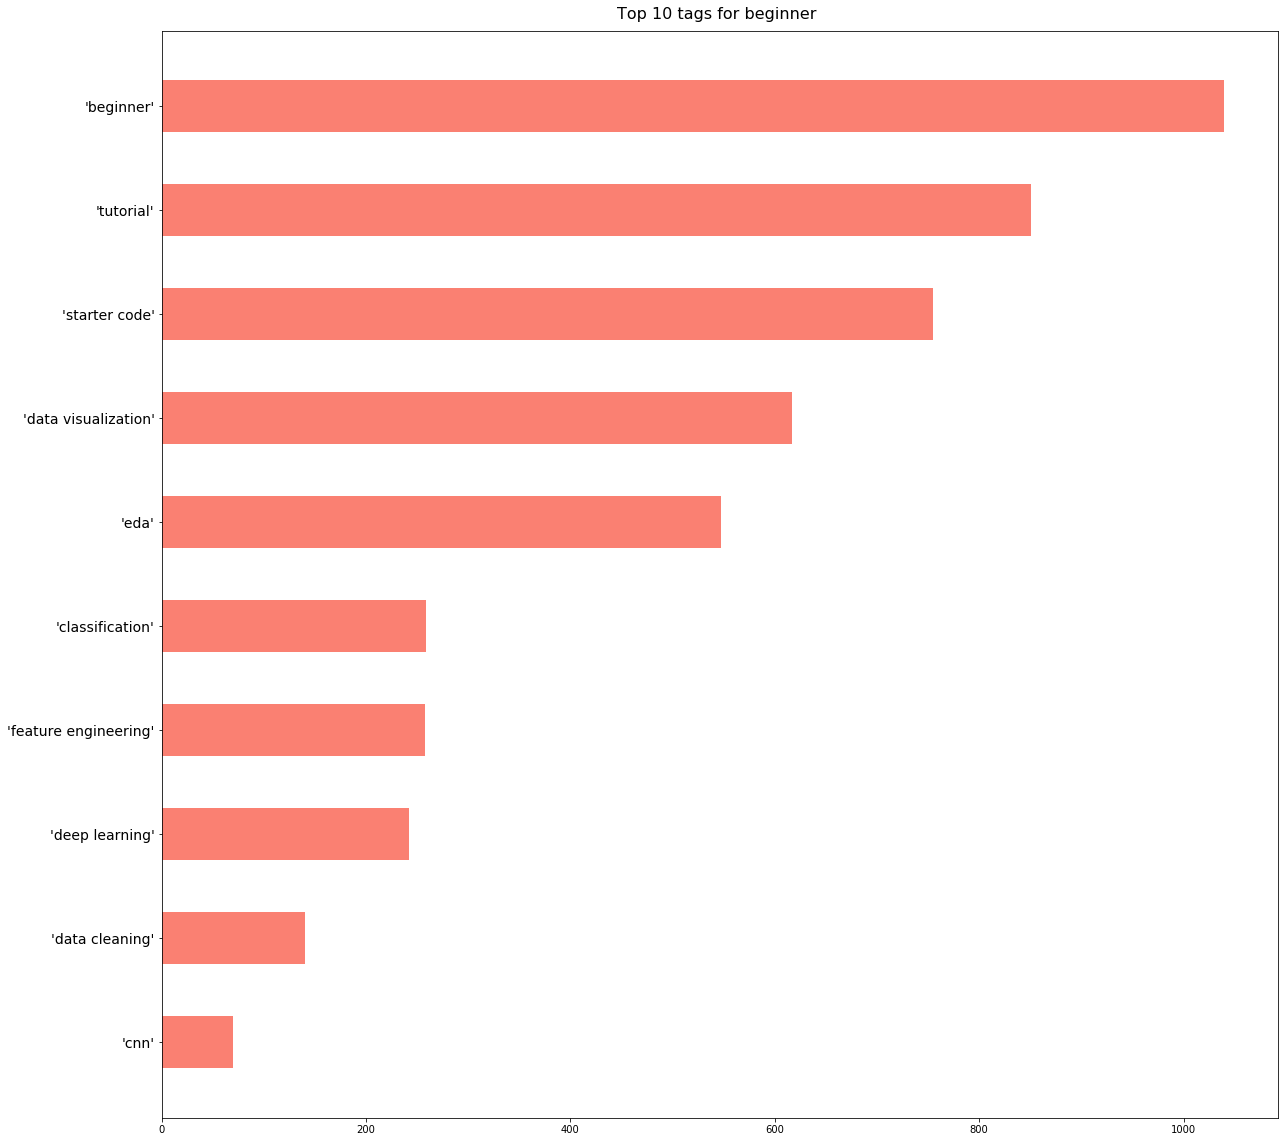

In [6]:
#nameCategories: count the top 10 tags

categories = {}  #dict, save the number of each tag
def categories_(x):
    x = x[1:-1]
    x = x.split(',')
    for i in x:
        i = i.strip()  #remove blank
        if i in categories:
            categories[i] += 1
        else:
            categories[i] = 1


df['nameCategories'].apply(lambda x: categories_(x))
nameCategories = sorted(categories.items(),key=lambda x:x[-1]) 
nameCategories = nameCategories[-10:]  #choice top 10 tags

figure = plt.figure(figsize=(20,20))

data=np.array([j for i, j in nameCategories]).astype(float) #convert to float

label=np.array([i for i, j in nameCategories]) #label
colors = ['#FA8072'] #color

num = len(nameCategories)
plt.barh(range(num), data, color=colors, height=0.5) 
plt.yticks(range(num),label, fontsize=14)

plt.title("Top 10 tags for beginner ", y=1.005, fontsize= 16) #set title, fontsize, title location
plt.savefig('../pic/Top 10 tags for beginner.png')


# if you are beginners, you could search following tags, especially beginner, tutorial, starter code.

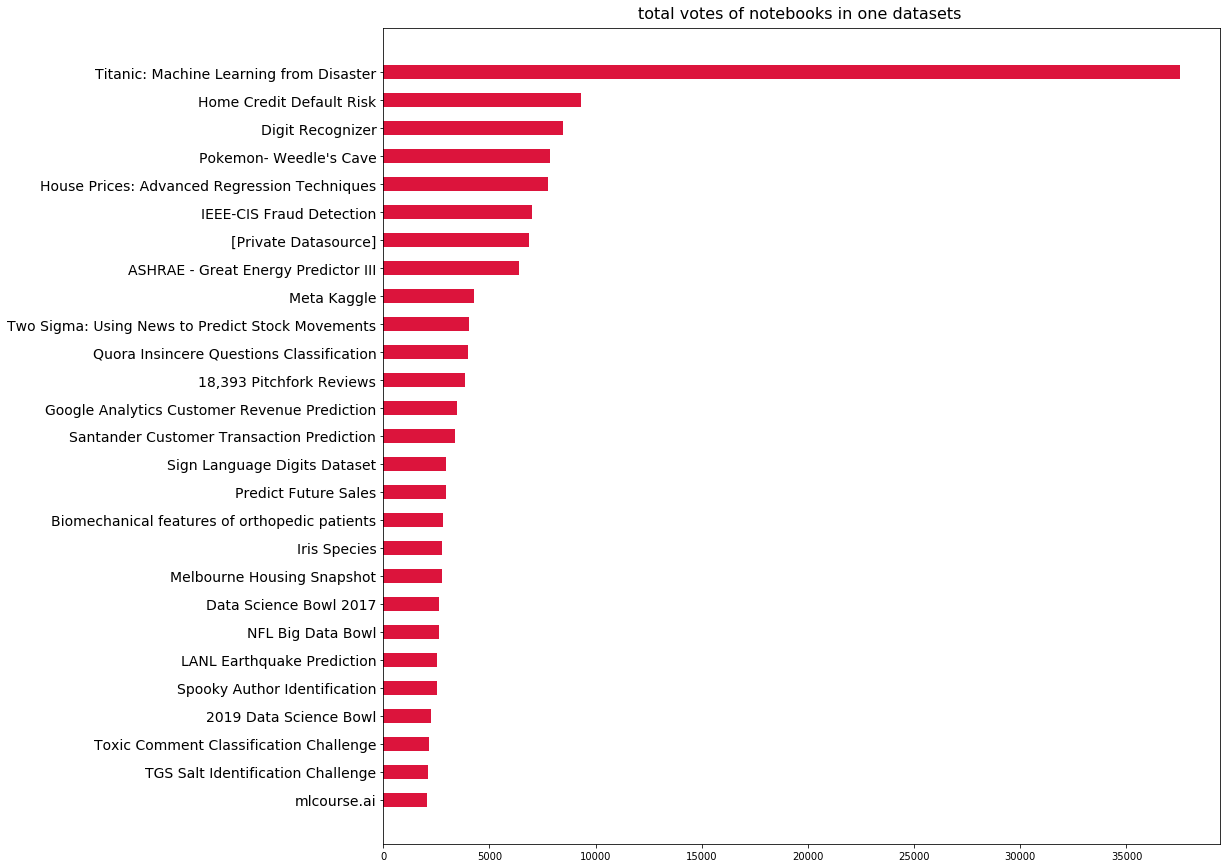

In [15]:
#According to notebook's total votes

figure = plt.figure(figsize=(15,15))

dataCom = df.groupby(by=['name'])['totalVotes'].sum().sort_values(ascending=True).reset_index()
dataCom = dataCom[dataCom['totalVotes'] >=2000]    #choice the number over 2000
data=np.array([i for i in dataCom['totalVotes'].values]).astype(float) #将convert to float

label=np.array([j for j in dataCom['name']]) #label
colors = ['#DC143C'] #color

num = len(dataCom)
plt.barh(range(num), data, color=colors, height=0.5) 
plt.yticks(range(num),label, fontsize=14)

plt.title("total votes of notebooks in one datasets ", y=1.005, fontsize= 16) #set title, title location, fontsize
plt.savefig('../pic/total votes of notebooks in one datasets.png')

#if you are a beginner, you'd better choose top 5 database to play, you will get lots of help from others.

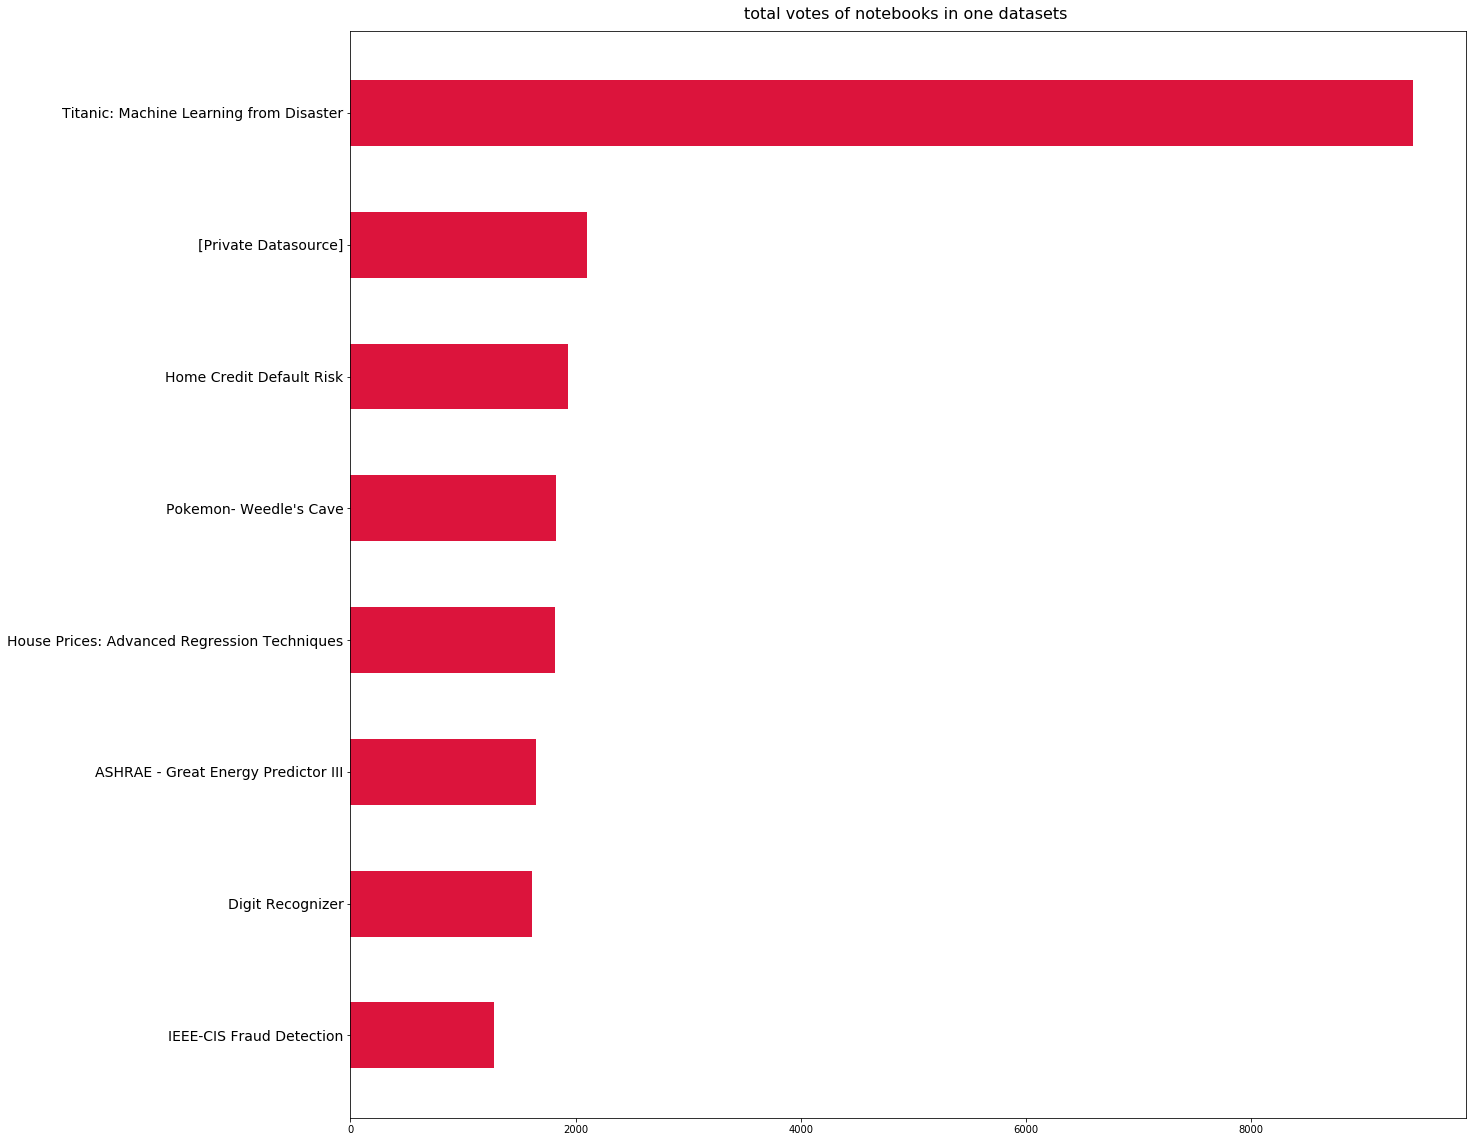

In [9]:
#According to notebook's total votes

figure = plt.figure(figsize=(20,20))

dataCom = df.groupby(by=['name'])['totalComments'].sum().sort_values(ascending=True).reset_index()
dataCom = dataCom[dataCom['totalComments'] >=1000]    #choice the number over 2000
data=np.array([i for i in dataCom['totalComments'].values]).astype(float) #将convert to float

label=np.array([j for j in dataCom['name']]) #label
colors = ['#DC143C'] #color

num = len(dataCom)
plt.barh(range(num), data, color=colors, height=0.5) 
plt.yticks(range(num),label, fontsize=14)

plt.title("total votes of notebooks in one datasets ", y=1.005, fontsize= 16) #set title, title location, fontsize
plt.savefig('../pic/total Comments of notebooks in one datasets.png')

#if you are a beginner, you'd better choose Titanic !!!!!!  hot discuss.

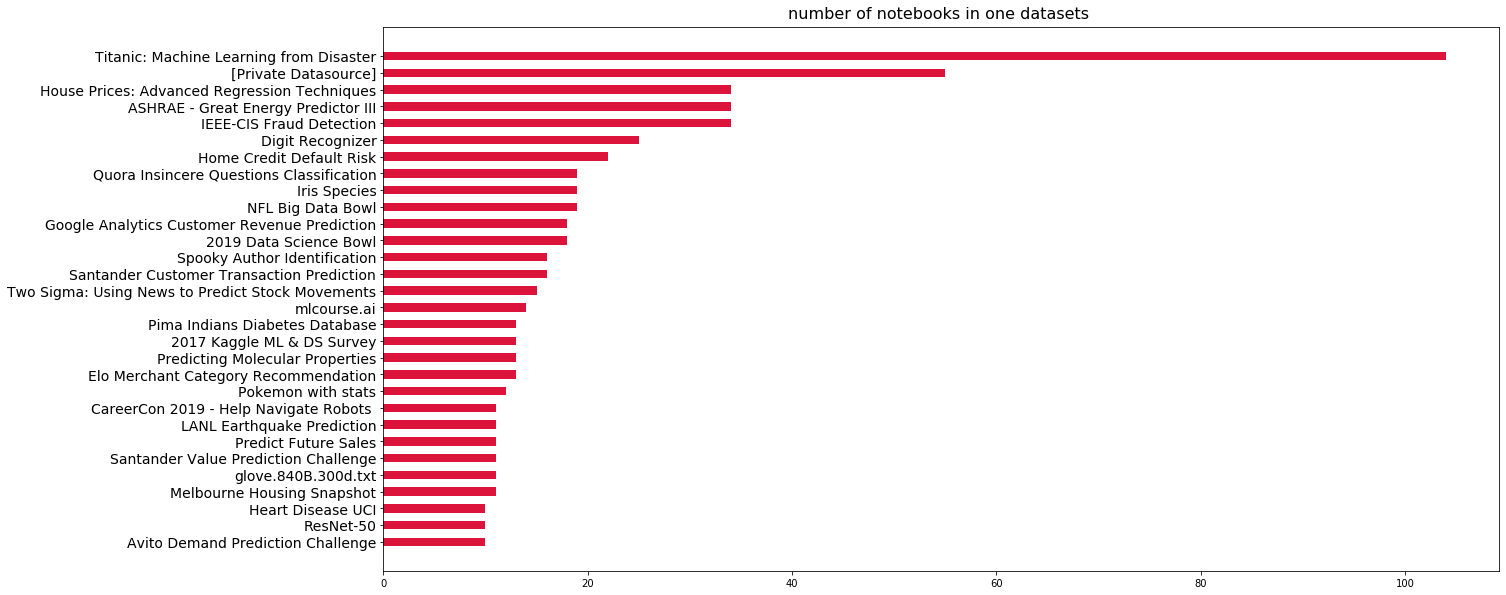

In [22]:
#according to notebook's number

figure = plt.figure(figsize=(20,10))

dataCom = df.groupby(by=['name']).agg('count').sort_values('title').reset_index()
dataCom = dataCom[dataCom['title'] >=10]    
data=np.array([i for i in dataCom['title'].values]).astype(float) 

label=np.array([j for j in dataCom['name']]) 
colors = ['#DC143C'] 
num = len(dataCom)
plt.barh(range(num), data, color=colors, height=0.5) 
plt.yticks(range(num),label, fontsize=14)

plt.title("number of notebooks in one datasets ", y=1.005, fontsize= 16) 
plt.savefig('../pic/number of notebooks in one datasets .png')

#if you are a beginner, you'd better choose top 5 database to play, you will get lots of help from others.

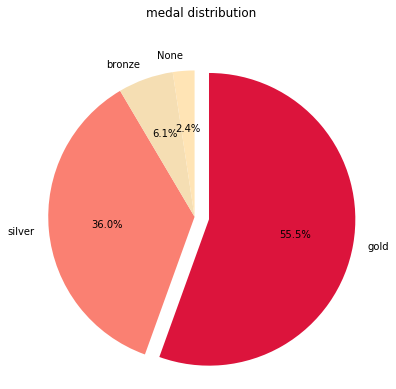

In [20]:
#medel pie
figure = plt.figure(figsize=(6,6))
#fig,ax=plt.subplots()
df['medal'] = df['medal'].fillna('None')

dataMedal = df.groupby(by=['medal']).agg('count')['title'].sort_values(ascending=False)  #sort data :ascending
data=np.array([i for i in dataMedal.values]).astype(float) #float
explode=[0.1,0,0,0] #explode type
label=np.array([j for j in dataMedal.index]) #label
colors = ['#DC143C','#FA8072','#F5DEB3','#FFE4B5'] #color
plt.pie(data,labels=label,autopct='%.1f%%',explode=explode, colors=colors, startangle=90,counterclock=False) #autopct，startangle，counterclock
plt.title("medal distribution", y=1.1, fontsize= 12) 
plt.axis("equal") # x=y
plt.savefig('../pic/medal distribution.png')

#Most of writter gets gold in that competition, so they have deep command of this data.

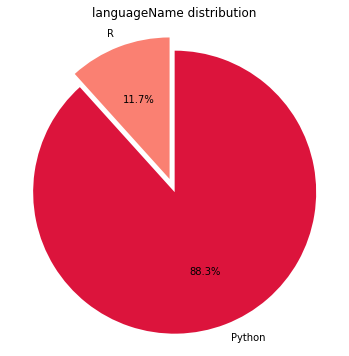

In [21]:
#language pie
figure = plt.figure(figsize=(6,6))
#fig,ax=plt.subplots()

dataMedal = df.groupby(by=['languageName']).agg('count')['title'].sort_values(ascending=False)  
data=np.array([i for i in dataMedal.values]).astype(float) 
explode=[0.1,0] 
label=np.array([j for j in dataMedal.index]) 
colors = ['#DC143C','#FA8072'] 
plt.pie(data,labels=label,autopct='%.1f%%',explode=explode, colors=colors, startangle=90,counterclock=False) 
plt.title("languageName distribution", y=1, fontsize= 12)
plt.axis("equal")
plt.savefig('../pic/languageName distribution.png')

#python is the best!!!

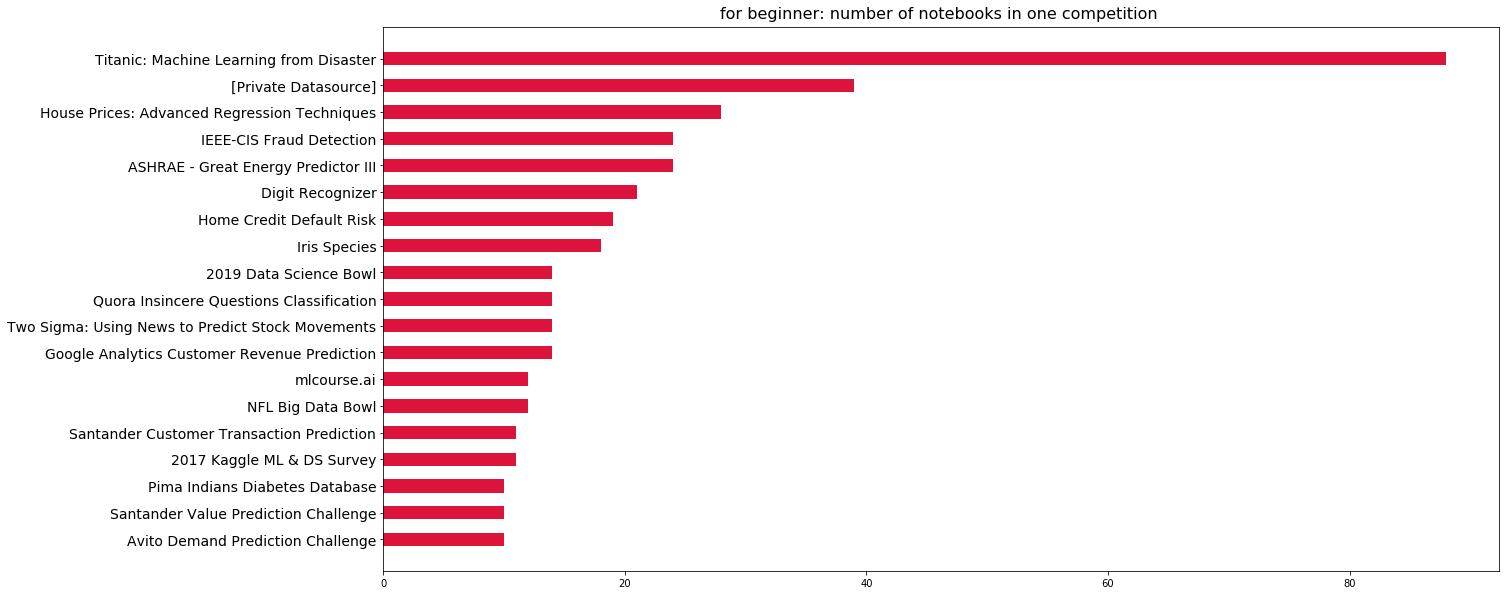

In [28]:
#tag beginner number of notebook

beginner = df[df.nameCategories.str.contains('beginner')]  

figure = plt.figure(figsize=(20,10))

dataCom = beginner.groupby(by='name')['title'].count().sort_values().reset_index()
dataCom = dataCom[dataCom['title'] >=10]    
data=np.array([i for i in dataCom['title'].values]).astype(float) 

label=np.array([j for j in dataCom['name']]) 
colors = ['#DC143C'] 
num = len(dataCom)
plt.barh(range(num), data, color=colors, height=0.5) 
plt.yticks(range(num),label, fontsize=14)

plt.title("for beginner: number of notebooks in one competition ", y=1.005, fontsize= 16) 
plt.savefig("../pic/for beginner: number of notebooks in one competition.png")

#for beginner : following competition you must paticapate

In [241]:
#tag beginner number of notebook

beginner = df[df.nameCategories.str.contains('beginner')]  #find rows contain beginner.
dataCom = beginner[beginner['totalVotes'] >=2500]    #filter


In [242]:
dataCom

,scriptVersionDateCreated,title,sourceType,name,medal,languageName,totalVotes,totalComments,outputZip,nameCategories
0,2017-08-18T01:42:22.337Z,Introduction to CNN Keras - 0.997 (top 6%),Competition,Digit Recognizer,gold,Python,4339,690,"[('Data', 1), ('Notebook', 1), ('Hidden', 1), ...","['beginner', 'cnn']"
1,2018-09-23T08:55:53.797Z,Data ScienceTutorial for Beginners,DatasetVersion,Pokemon- Weedle's Cave,gold,Python,3888,900,"[('Notebook', 1), ('Hidden', 1), ('Visualizati...","['tutorial', 'beginner', 'eda', 'data visualiz..."
2,2017-12-26T19:42:22.887Z,Exploring Survival on the Titanic,Competition,Titanic: Machine Learning from Disaster,gold,R,3104,959,"[('Notebook', 1), ('Visualization', 9), ('Hidd...","['tutorial', 'beginner', 'feature engineering'..."
3,2017-12-31T18:27:16.713Z,A Data Science Framework: To Achieve 99% Accuracy,Competition,Titanic: Machine Learning from Disaster,gold,Python,3058,430,"[('Notebook', 1), ('Hidden', 1), ('Visualizati...","['tutorial', 'beginner', 'data visualization',..."
492,2018-09-23T08:55:53.797Z,Data ScienceTutorial for Beginners,DatasetVersion,Pokemon- Weedle's Cave,gold,Python,3888,900,"[('Hidden', 1), ('Notebook', 1), ('Visualizati...","['tutorial', 'beginner', 'eda', 'data visualiz..."
493,2017-12-26T19:42:22.887Z,Exploring Survival on the Titanic,Competition,Titanic: Machine Learning from Disaster,gold,R,3104,959,"[('Hidden', 25), ('Notebook', 1), ('Visualizat...","['tutorial', 'beginner', 'feature engineering'..."
494,2017-12-31T18:27:16.713Z,A Data Science Framework: To Achieve 99% Accuracy,Competition,Titanic: Machine Learning from Disaster,gold,Python,3058,430,"[('Hidden', 1), ('Notebook', 1), ('Visualizati...","['tutorial', 'beginner', 'data visualization',..."


In [ ]:
#Titanic, Digit, House Price crawer

def competition_Crawel():
    
    name = ['Titanic', 'Digit_Recognizer', 'HousePrice']
    index = ['167', '143', '1469']

    for p in range(len(name)):

        headers = {"authority": "www.kaggle.com",
        "method": "GET",
        "scheme": "https",
        "accept": "*/*",
        "accept-encoding":"gzip, deflate, br",
        "accept-language": "zh-CN,zh;q=0.9",
        "cookie": "_ga=GA1.2.1962462287.1573713720; ka_sessionid=4e49b0394b3b3d3e59b1acb5bfc83b8944c56466; CSRF-TOKEN=CfDJ8LdUzqlsSWBPr4Ce3rb9VL9eCccnUcZ6NOkgbCa1U0AWr7kkOFIGQHZNJn_kYbVd-V5uLBdDyieKVgoUB2r1wbycbaeixTBpYthbW_46q0TVyh_XAYqGiUC-_zfS5ui44iiAIEVmMmkS-zlm1rc-S3I; GCLB=CKXMtLzRpfi_Pw; _gid=GA1.2.42370481.1582512210; _gat_gtag_UA_12629138_1=1; XSRF-TOKEN=CfDJ8LdUzqlsSWBPr4Ce3rb9VL8_MRdNE8Ty35QWiByES8gbuYXgS8YQpg2AmFfOD3_ELs1AwFbbYuCXIbIq3U267rAooIPbnU4-8QbSrVmYID3C3T3DUdCZInOILkTY0wduoBCBBjRTbhlFya6OJ1Xpwuw",
        "referer": "https://www.kaggle.com/discussion",
        "sec-fetch-mode": "cors",
        "sec-fetch-site": "same-origin",
        "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36"
                  }

        def get_content(url):
            time.sleep(0.2)
            response = requests.get(contextUrl, headers)
            response.encoding = 'utf-8'
            data_ = response.json()
            content = data_['comment']['content']  #context 

            return content



        for page in tqdm(range(20)):
            try:
                time.sleep(0.3)
                url = 'https://www.kaggle.com/forums/{}/topics.json?sortBy=hot&group=all&page={}&pageSize=20&category=all'.format(index[p], page) 
                response = requests.get(url, headers)
                response.encoding = 'utf-8'

                data = response.json()  


                baseUrl = 'https://www.kaggle.com'

                for dataPer in data['topics']:
                    title = dataPer['title']
                    tier = dataPer['userAvatar']['tier']
                    contextUrl = dataPer['topicUrl']     
                    contextUrl = contextUrl.split('/')[-1]
                    contextUrl = baseUrl + '/topics/' + contextUrl + '.json'

                    content = get_content(contextUrl)

                    with open(name[p] + '.csv', 'a') as f:
                            writer = csv.writer(f)
                            row = [title, tier, content]
                            writer.writerow(row)
            except:
                pass

#main        
competition_Crawel()

In [11]:
#LDA TFIDF 
dataTitanic = pd.read_csv('../data/Titanic.csv', header=0, names=['title', 'tier', 'content'])
dataCnn = pd.read_csv('../data/Digit_Recognizer.csv', header=0, names=['title', 'tier', 'content'])
dataPrice = pd.read_csv('../data/HousePrice.csv', header=0, names=['title', 'tier', 'content'])
gc.collect()

23088

In [12]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import pandas as pd
import numpy as np
np.random.seed(400)
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")  #Stemmer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer


#definiting the string has number in it
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
 
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
 
    return False



#discuss title
def solve(data):
    wordDictTitle = {}
    wordTitleTotal = []
    def word_count(string):
        if isinstance(string, str):
            new_text = string.strip()
            punc = '~`!#$%^&*()_+-=|\';":/.,?><~·！@#￥%……&*（）——+-=“：’；、。，？》《{}'
            new_text = re.sub(r"[%s]+" %punc, "",new_text)  #remove
            str_list = re.split(' ', new_text)


            for str_word in str_list:
                if (str_word in stop_words) | (len(str_word) <4) | (is_number(str_word)):  #remove stopwords, short words, number
                    continue

               # str_word = stemmer.stem(WordNetLemmatizer().lemmatize(str_word, pos='v'))
                str_word = stemmer.stem(str_word)
                wordTitleTotal.append(str(str_word)) #dic


                if str_word in wordDictTitle.keys():    
                    wordDictTitle[str_word] = wordDictTitle[str_word] + 1
                else:
                    wordDictTitle[str_word] = 1

    data['title'].apply(lambda x:word_count(x))
    data['content'].apply(lambda x:word_count(x))
    wordTitleTotal2 = gensim.corpora.Dictionary([wordTitleTotal])  #convert to list
    sortTitle = dict(sorted(wordDictTitle.items(), key=lambda e: e[1], reverse=True))   #sort
    
    bow_corpus = [wordTitleTotal2.doc2bow([doc]) for doc in  wordTitleTotal]
        # TODO
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                       num_topics = 2, 
                                       id2word = wordTitleTotal2,                                    
                                       workers = 2)
    
    #lda print
    print(lda_model.show_topics(2))
    
    gc.collect()
        
        
    
    return wordTitleTotal, sortTitle, wordTitleTotal2, lda_model #total word， tf, dictionary, lda_model, 


#analysis three datasets
wordTit, sortTit, dicTit, ldaTic = solve(dataTitanic)   
wordCnn, sortCnn, dicCnn, ldaCnn = solve(dataCnn)
wordPrice, sortPrice, dicPrice, ldaPrice = solve(dataPrice)   


#tf-idf
vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b')
word = [' '.join(wordTit), ' '.join(wordCnn), ' '.join(wordPrice)]   
X = vectorizer.fit_transform(word)

name = vectorizer.get_feature_names()
article1 = X.toarray()[0] #one line presents one topic
article2 = X.toarray()[1]
article3 = X.toarray()[2]

df = pd.DataFrame({'name':name, 'article1': article1, 'article2':article2, 'article3':article3})
df1 = df[['name', 'article1']].sort_values('article1', ascending=False).reset_index(drop=True)  #article1 tfidf
df2 = df[['name', 'article2']].sort_values('article2', ascending=False).reset_index(drop=True)  #article2 tfidf
df3 = df[['name', 'article3']].sort_values('article3', ascending=False).reset_index(drop=True)  #article2 tfidf

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhangwenkai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[(0, '0.017*"data" + 0.016*"use" + 0.012*"learn" + 0.009*"train" + 0.008*"accuraci" + 0.008*"titan" + 0.007*"first" + 0.007*"kernel" + 0.006*"would" + 0.006*"submiss"'), (1, '0.025*"model" + 0.015*"predict" + 0.013*"featur" + 0.012*"score" + 0.010*"surviv" + 0.007*"like" + 0.007*"column" + 0.007*"valu" + 0.006*"kaggl" + 0.006*"help"')]
[(0, '0.018*"train" + 0.010*"result" + 0.008*"file" + 0.008*"learn" + 0.008*"digit" + 0.008*"would" + 0.008*"like" + 0.007*"score" + 0.007*"predict" + 0.007*"label"'), (1, '0.017*"use" + 0.014*"data" + 0.011*"test" + 0.010*"code" + 0.007*"imag" + 0.007*"accuraci" + 0.006*"model" + 0.006*"nbsp" + 0.006*"know" + 0.005*"anyon"')]
[(0, '0.025*"model" + 0.011*"learn" + 0.010*"data" + 0.010*"team" + 0.010*"valu" + 0.009*"regress" + 0.009*"competit" + 0.009*"variabl" + 0.009*"want" + 0.008*"test"'), (1, '0.024*"data" + 0.017*"featur" + 0.010*"look" + 0.009*"miss" + 0.009*"use" + 0.008*"would" + 0.007*"model" + 0.007*"score" + 0.007*"column" + 0.006*"tri"')]


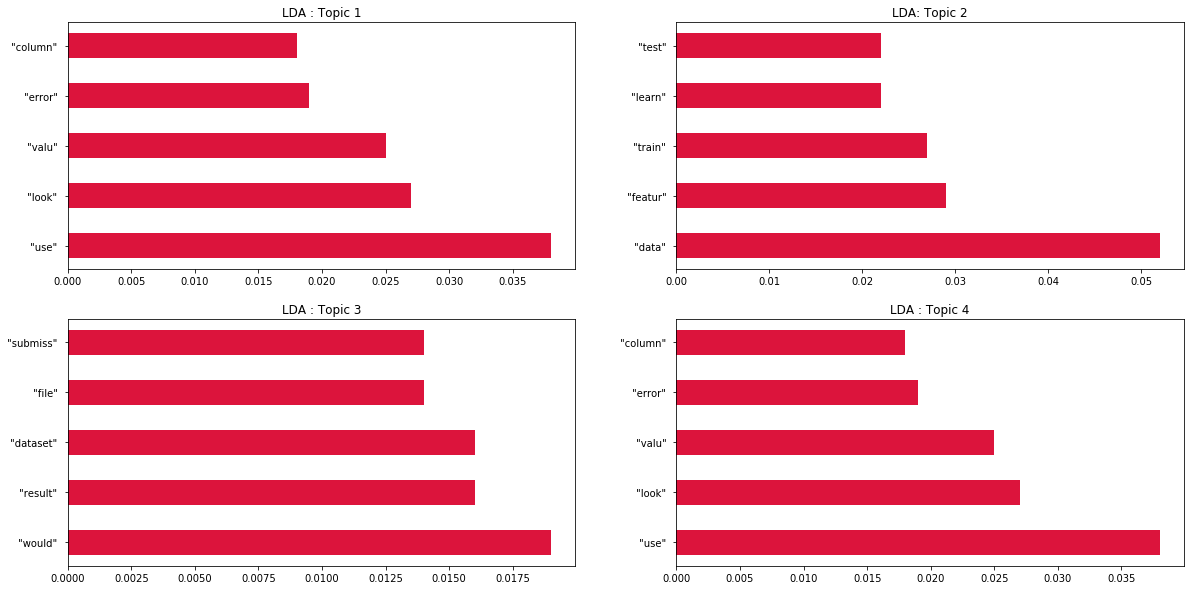

In [12]:
#total word LDA

wordTotal = wordTit + wordCnn + wordPrice  #conclude all words
dicTotal = gensim.corpora.Dictionary([wordTotal])  #convert to list
bow_corpus = [dicTotal.doc2bow([doc]) for doc in  wordTotal]  #doc2bow

lda_model =  gensim.models.LdaMulticore(bow_corpus,   #train LDA，4 topics
                                       num_topics = 4, 
                                       id2word = dicTotal,                                    
                                       workers = 2)


first = lda_model.show_topics(0)[0][1].split('+')
second = [i.split('*') for i in first][:5]

third = lda_model.show_topics(0)[1][1].split('+')
fourth = [i.split('*') for i in third][:5]

fifth = lda_model.show_topics(0)[2][1].split('+')
sixth = [i.split('*') for i in fifth][:5]

seventh = lda_model.show_topics(0)[3][1].split('+')
eighth = [i.split('*') for i in seventh][:5]

figure = plt.figure(figsize=(20, 10))
axes1 = figure.add_subplot(2, 2, 1)
axes2 = figure.add_subplot(2, 2, 2)
axes3 = figure.add_subplot(2, 2, 3)
axes4 = figure.add_subplot(2, 2, 4)

#topic 1
data=np.array([i[0] for i in second]).astype(float) #convert to float
label=np.array([j[1] for j in second]) #label
colors = ['#DC143C'] #color
num = len(label)
axes1.barh(label, data, color=colors, height=0.5) 
axes1.set_title('LDA : Topic 1')

#topic 2
data=np.array([i[0] for i in fourth]).astype(float) 
label=np.array([j[1] for j in fourth]) 
colors = ['#DC143C'] 
axes2.barh(label, data, color=colors, height=0.5) 
axes2.set_title('LDA: Topic 2')

#topic 3
data=np.array([i[0] for i in sixth]).astype(float) 
label=np.array([j[1] for j in sixth]) 
colors = ['#DC143C'] 
num = len(label)
axes3.barh(label, data, color=colors, height=0.5) 
axes3.set_title('LDA : Topic 3')

#topic 4
data=np.array([i[0] for i in eighth]).astype(float) 
label=np.array([j[1] for j in eighth]) 
colors = ['#DC143C'] 
axes4.barh(label, data, color=colors, height=0.5) 
axes4.set_title('LDA : Topic 4')

plt.savefig('totalTopic.png')

# as we can see, the discussion divides into two parts. One for how to participate the competition, about how to train, test, how to use data.
#Another for EDA, how to use columns, how to do feature engineering.

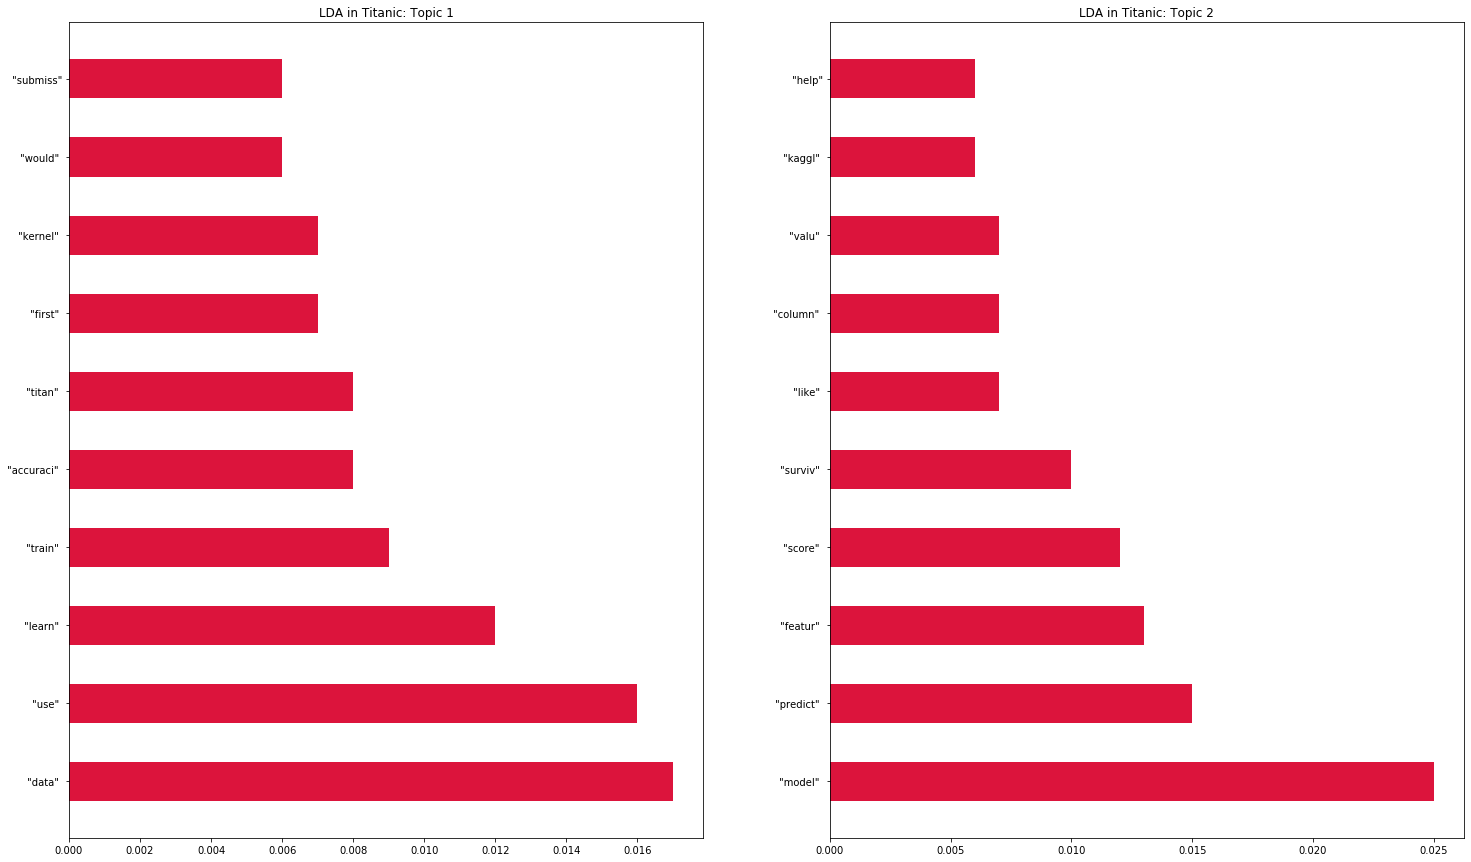

In [17]:
# LDA in titanic

first = ldaTic.show_topics(2)[0][1].split('+')
second = [i.split('*') for i in first]

third = ldaTic.show_topics(2)[1][1].split('+')
fourth = [i.split('*') for i in third]

figure = plt.figure(figsize=(25, 15))
axes1 = figure.add_subplot(1, 2, 1)
axes2 = figure.add_subplot(1, 2, 2)

#topic 1
data=np.array([i[0] for i in second]).astype(float) #将其转换成float格式
label=np.array([j[1] for j in second]) #设置标签
colors = ['#DC143C'] #设置颜色
num = len(label)
axes1.barh(label, data, color=colors, height=0.5) 
axes1.set_title('LDA in Titanic: Topic 1')

#topic 2
data=np.array([i[0] for i in fourth]).astype(float) #将其转换成float格式
label=np.array([j[1] for j in fourth]) #设置标签
colors = ['#DC143C'] #设置颜色
axes2.barh(label, data, color=colors, height=0.5) 
axes2.set_title('LDA in Titanic: Topic 2')
plt.savefig('LDA in Titanic')

# one for how to do EDA, another is choice which model

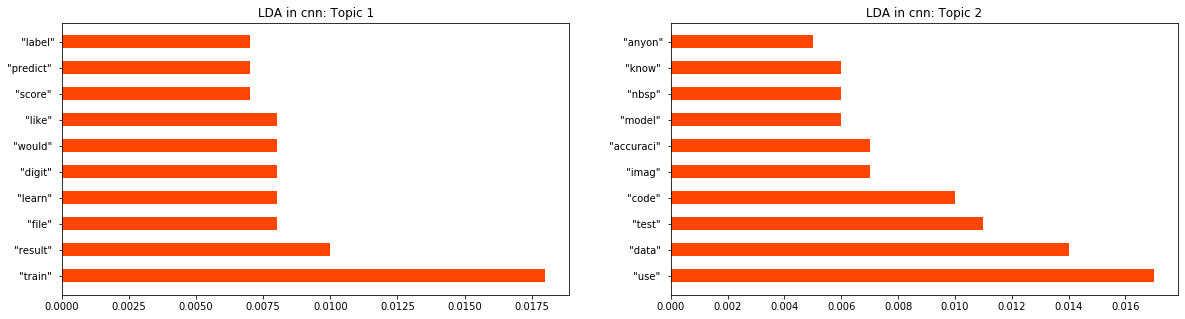

In [25]:
# LDA in cnn

first = ldaCnn.show_topics(2)[0][1].split('+')
second = [i.split('*') for i in first]

third = ldaCnn.show_topics(2)[1][1].split('+')
fourth = [i.split('*') for i in third]

figure = plt.figure(figsize=(20, 5))
axes1 = figure.add_subplot(1, 2, 1)
axes2 = figure.add_subplot(1, 2, 2)

#topic 1
data=np.array([i[0] for i in second]).astype(float) #将其转换成float格式
label=np.array([j[1] for j in second]) #设置标签
colors = ['#FF4500'] #设置颜色
num = len(label)
axes1.barh(label, data, color=colors, height=0.5) 
axes1.set_title('LDA in cnn: Topic 1')

#topic 2
data=np.array([i[0] for i in fourth]).astype(float) #将其转换成float格式
label=np.array([j[1] for j in fourth]) #设置标签
colors = ['#FF4500'] #设置颜色
axes2.barh(label, data, color=colors, height=0.5) 
axes2.set_title('LDA in cnn: Topic 2')
plt.savefig('LDA in cnn.png')


# in deep learning competition. people want to learn how to play a model, and develop accuracy. not asking how to do EDA           

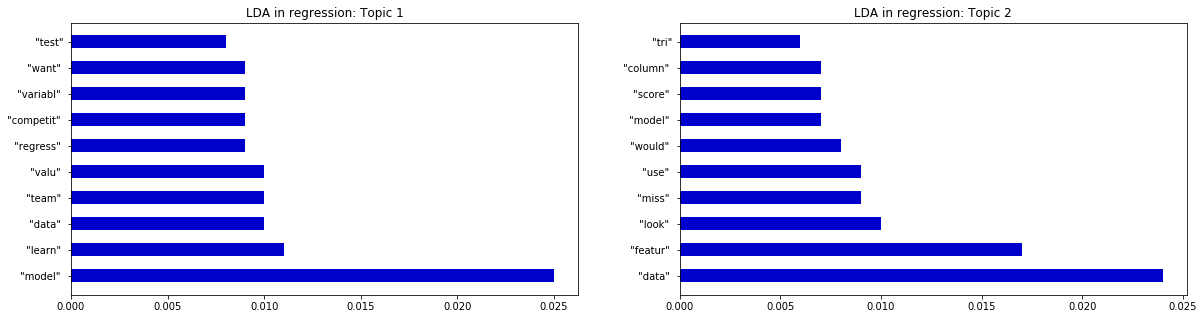

In [26]:
# LDA in regression

first = ldaPrice.show_topics(2)[0][1].split('+')
second = [i.split('*') for i in first]

third = ldaPrice.show_topics(2)[1][1].split('+')
fourth = [i.split('*') for i in third]

figure = plt.figure(figsize=(20, 5))
axes1 = figure.add_subplot(1, 2, 1)
axes2 = figure.add_subplot(1, 2, 2)

#topic 1
data=np.array([i[0] for i in second]).astype(float) #将其转换成float格式
label=np.array([j[1] for j in second]) #设置标签
colors = ['#0000CD'] #设置颜色
num = len(label)
axes1.barh(label, data, color=colors, height=0.5) 
axes1.set_title('LDA in regression: Topic 1')

#topic 2
data=np.array([i[0] for i in fourth]).astype(float) #将其转换成float格式
label=np.array([j[1] for j in fourth]) #设置标签
colors = ['#0000CD'] #设置颜色
axes2.barh(label, data, color=colors, height=0.5) 
axes2.set_title('LDA in regression: Topic 2')
plt.savefig('LDA in regression.png')

# in regression competition. people want to learn how to do feature enginering


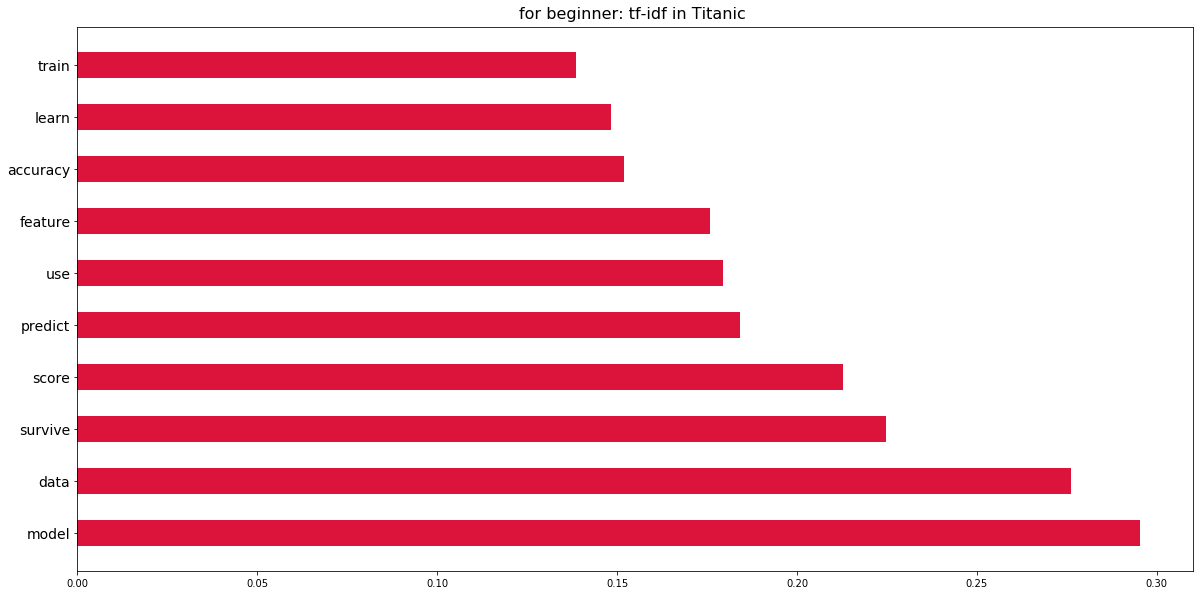

In [27]:
#tf-idf in Titanic

figure = plt.figure(figsize=(20,10))

df1.iloc[2, 0] = 'survive'
df1.iloc[7, 0] = 'feature'
df1.iloc[9, 0] = 'accuracy'


dfUse = df1.iloc[[0,1,2,4,5,6,7,9,10,11], :]
data=np.array([i for i in dfUse['article1'].values]).astype(float) 

label=np.array([j for j in dfUse['name']]) 
colors = ['#DC143C'] 
num = len(dfUse)
plt.barh(range(num), data, color=colors, height=0.5) 
plt.yticks(range(num),label, fontsize=14)

plt.title("for beginner: tf-idf in Titanic ", y=1.005, fontsize= 16) 

plt.savefig('for beginner: tf-idf in Titanic.png')



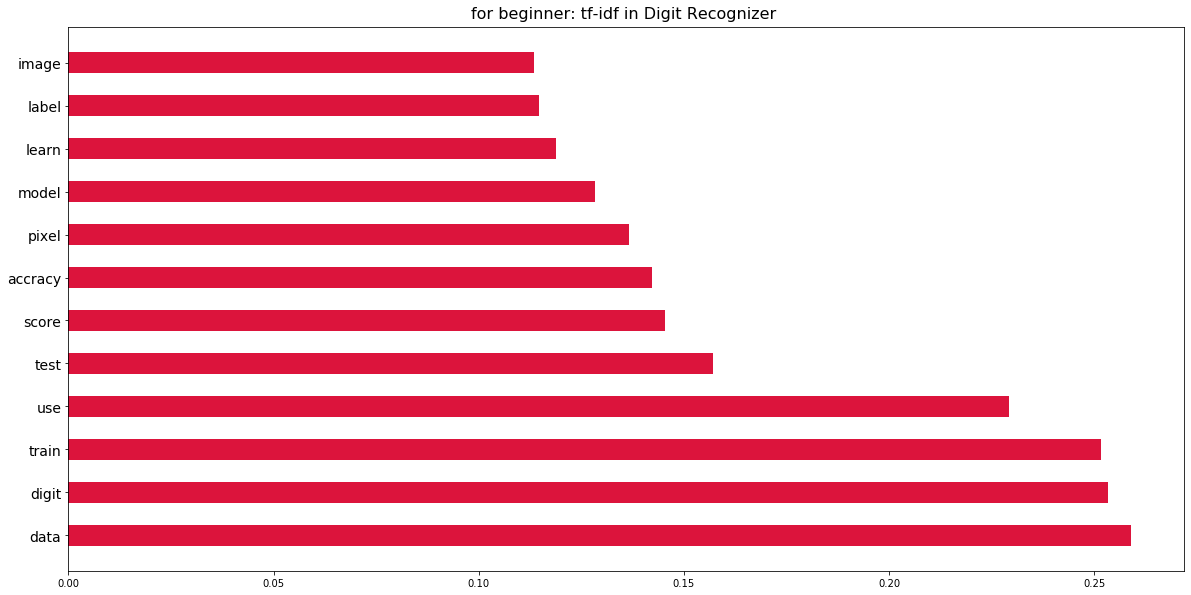

In [15]:
#tag beginner number of notebook

figure = plt.figure(figsize=(20,10))


df2.iloc[7, 0] = 'accracy'
df2.iloc[12, 0] = 'image'


dfUse = df2.iloc[[1,2,3,4,5,6,7,8,9,10,11,12], :]
data=np.array([i for i in dfUse['article2'].values]).astype(float) 

label=np.array([j for j in dfUse['name']]) 
colors = ['#DC143C'] 
num = len(dfUse)
plt.barh(range(num), data, color=colors, height=0.5) 
plt.yticks(range(num),label, fontsize=14)

plt.title("for beginner: tf-idf in Digit Recognizer ", y=1.005, fontsize= 16) 

plt.savefig('for beginner: tf-idf in Digit Recognizer.png')

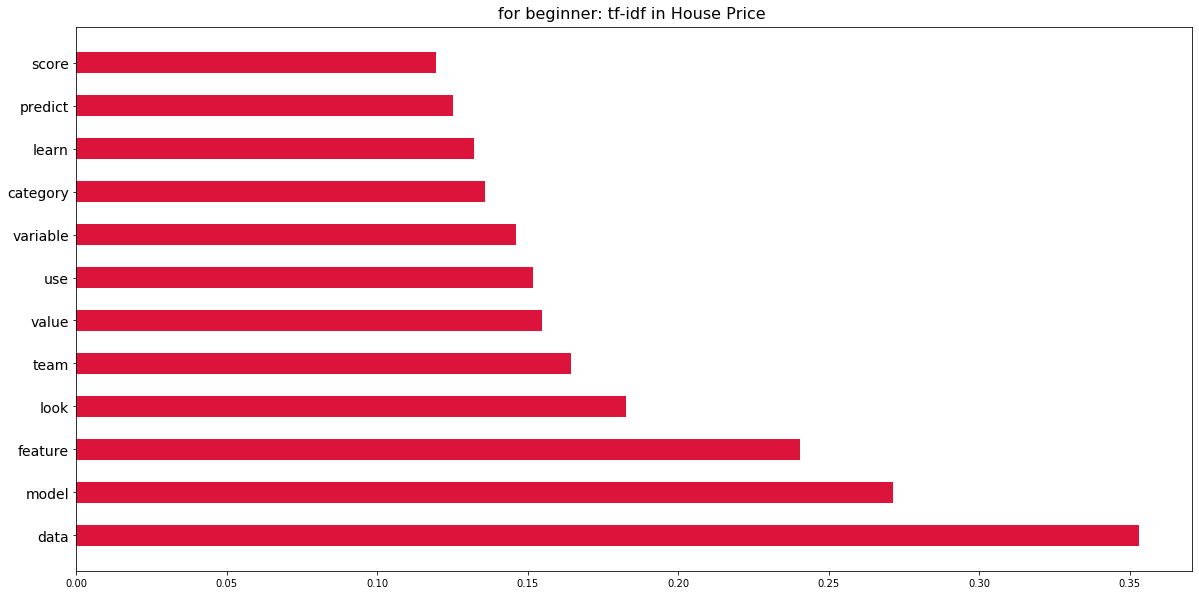

In [16]:
#tag beginner number of notebook

figure = plt.figure(figsize=(20,10))


df3.iloc[2, 0] = 'feature'
df3.iloc[6, 0] = 'value'
df3.iloc[8, 0] = 'variable'
df3.iloc[9, 0] = 'category'



dfUse = df3.iloc[[0,1,2,3,5,6,7,8,9,10,11,12], :]
data=np.array([i for i in dfUse['article3'].values]).astype(float) 

label=np.array([j for j in dfUse['name']]) 
colors = ['#DC143C'] 
num = len(dfUse)
plt.barh(range(num), data, color=colors, height=0.5) 
plt.yticks(range(num),label, fontsize=14)

plt.title("for beginner: tf-idf in House Price ", y=1.005, fontsize= 16) 
plt.savefig('for beginner: tf-idf in House Price.png')



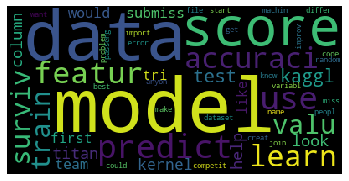

In [36]:
from wordcloud import WordCloud

#wordcloud
def draw_cloud(data):

    wc = WordCloud(  width=400,
                              height=200,
                              max_words=50)

    
    wc.generate_from_frequencies(data)  # tf

    plt.imshow(wc)
    plt.axis("off")  
    plt.show()
    wc.to_file('cloud.png')
    

draw_cloud(sortTit)
